## Importation des libraires

In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

In [49]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [51]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [52]:
df = df.head(5)
print(df)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [53]:
types = df.dtypes
print(types)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [54]:
skew = df.skew()
print(skew)

Pregnancies                 0.722507
Glucose                     0.163883
BloodPressure              -1.896988
SkinThickness              -1.640498
Insulin                     1.108539
BMI                         1.133739
DiabetesPedigreeFunction    1.903620
Age                         0.966662
Outcome                    -0.608581
dtype: float64


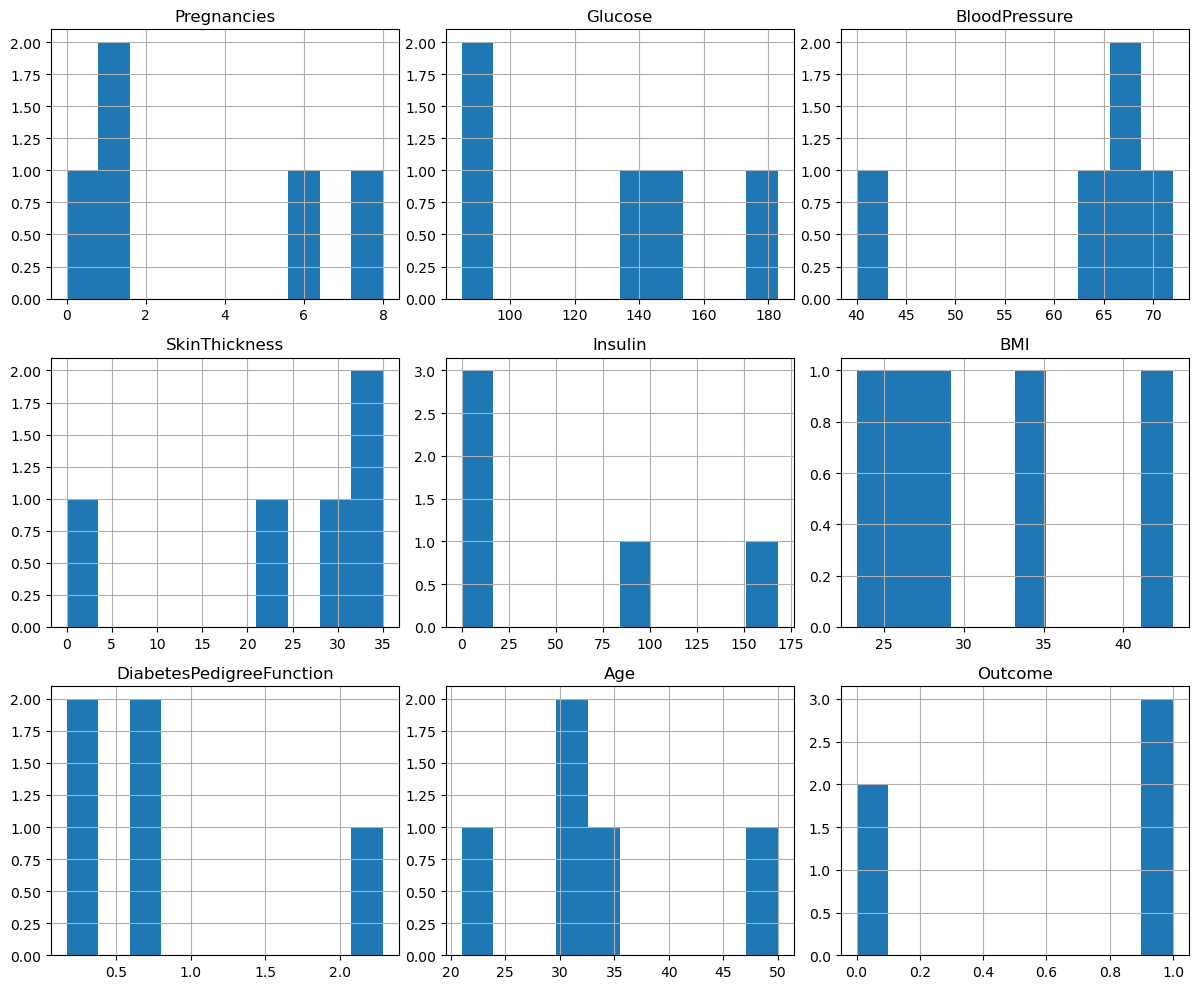

In [55]:
df.hist(figsize=(12, 10))
pyplot.tight_layout()
pyplot.show()

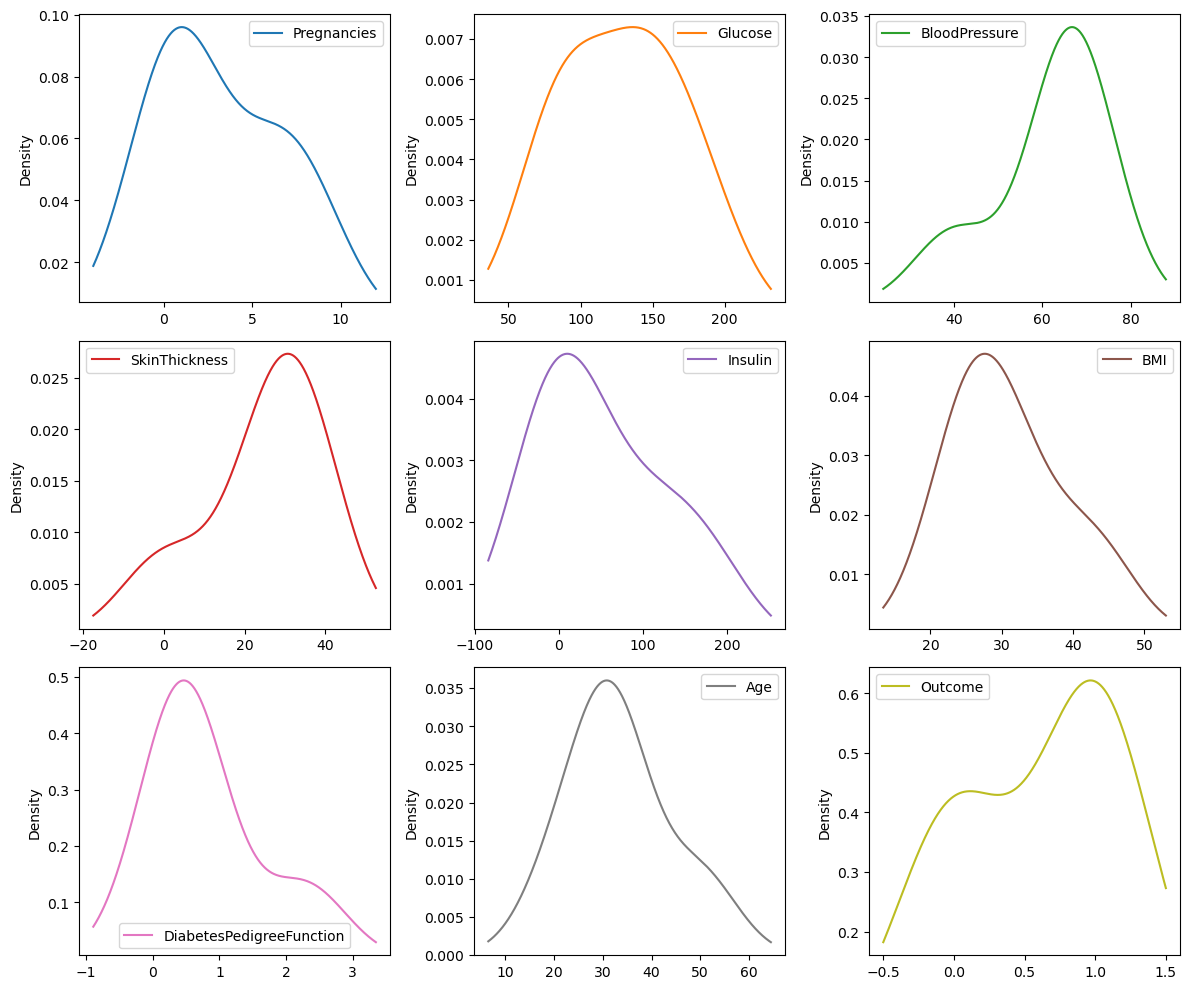

In [56]:
df.plot(kind='density', subplots=True, layout=(3, 3), sharex=False, figsize=(12, 10))
pyplot.tight_layout()  # Optional for better spacing
pyplot.show()

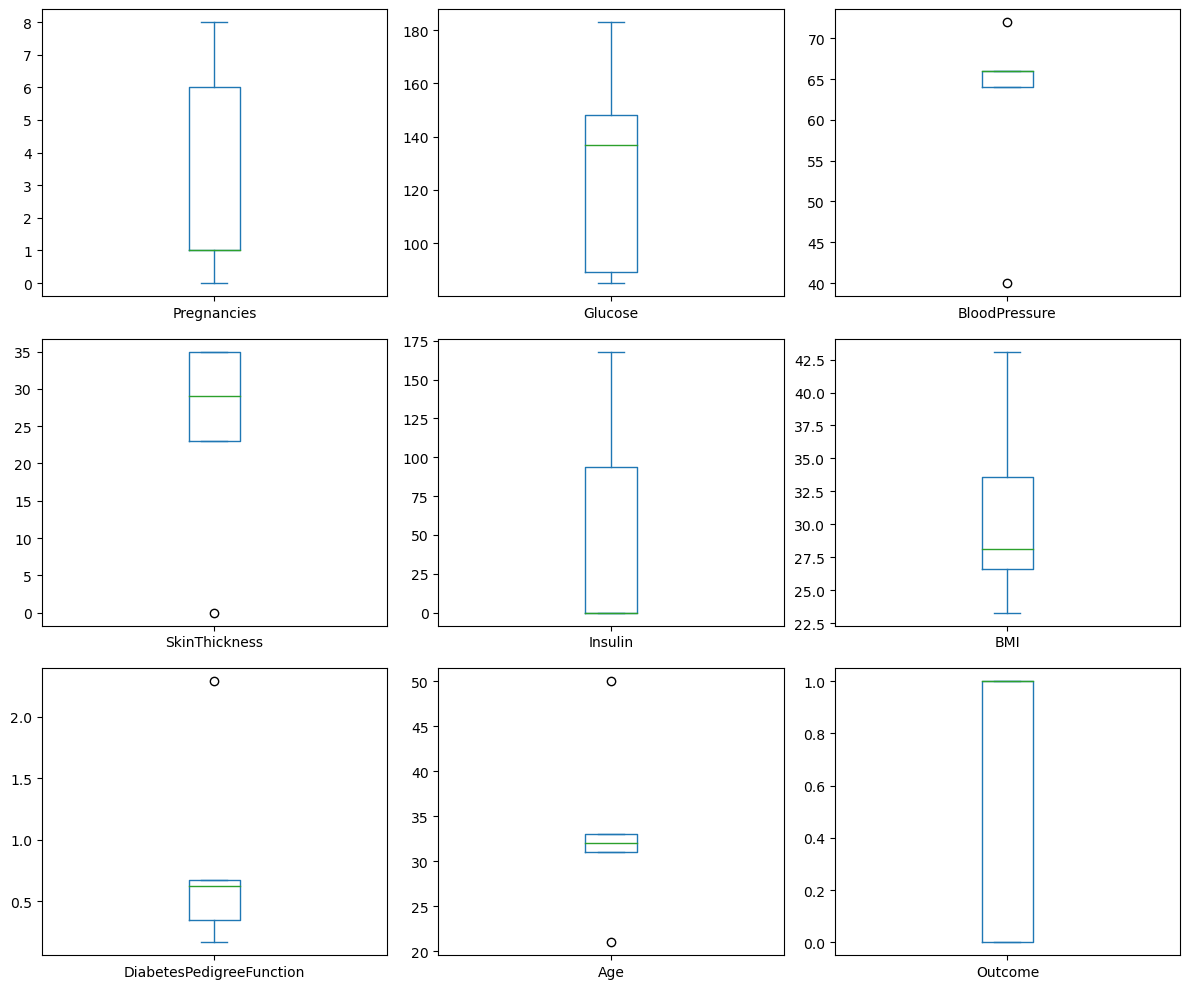

In [57]:
df.plot(kind='box', subplots=True, layout=(3, 3), sharex=False, sharey=False, figsize=(12, 10))
pyplot.tight_layout()
pyplot.show()

In [58]:
# Remplacer les 0 par NaN pour les colonnes concernées
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_with_zeros] = df[columns_with_zeros].replace(0, np.nan)


In [59]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,5.000000,5.000000,5.000000,4.000000,2.000000,5.000000,5.000000,5.000000,5.000000
mean,3.200000,128.400000,61.600000,30.500000,131.000000,30.940000,0.821000,33.400000,0.600000
std,3.563706,41.458413,12.441865,5.744563,52.325902,7.749387,0.845657,10.454664,0.547723
min,0.000000,85.000000,40.000000,23.000000,94.000000,23.300000,0.167000,21.000000,0.000000
25%,1.000000,89.000000,64.000000,27.500000,112.500000,26.600000,0.351000,31.000000,0.000000
50%,1.000000,137.000000,66.000000,32.000000,131.000000,28.100000,0.627000,32.000000,1.000000
75%,6.000000,148.000000,66.000000,35.000000,149.500000,33.600000,0.672000,33.000000,1.000000
max,8.000000,183.000000,72.000000,35.000000,168.000000,43.100000,2.288000,50.000000,1.000000


In [60]:
# Vérifier les valeurs manquantes
print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               1
Insulin                     3
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


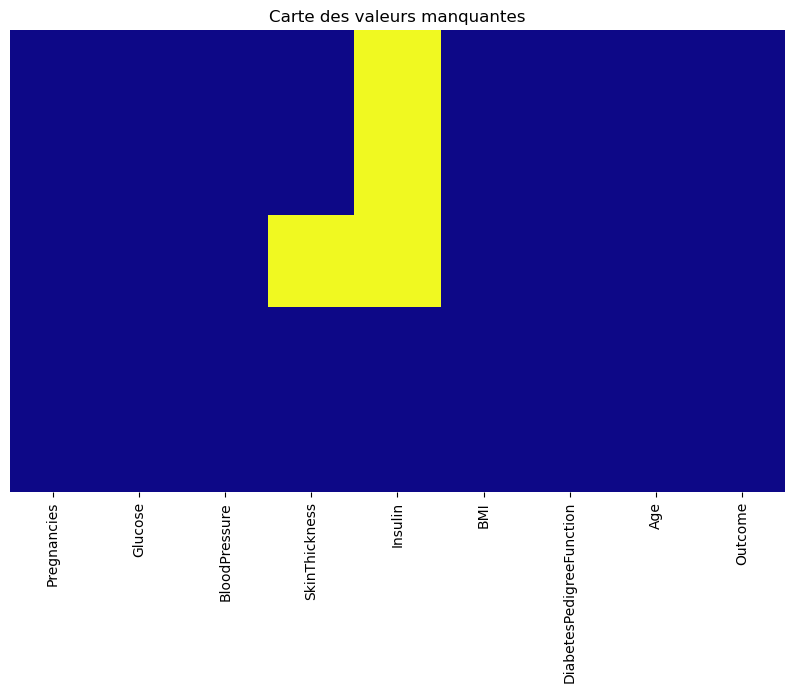

In [61]:
plt.figure(figsize=(10, 6))  
sns.heatmap(df.isnull(), cbar=False, cmap='plasma', yticklabels=False)
plt.title('Carte des valeurs manquantes') 
plt.show()

In [62]:
# Imputer les valeurs manquantes par la médiane (ou moyenne si préférable)
for column in columns_with_zeros:
    df[column] = df[column].fillna(df[column].median())

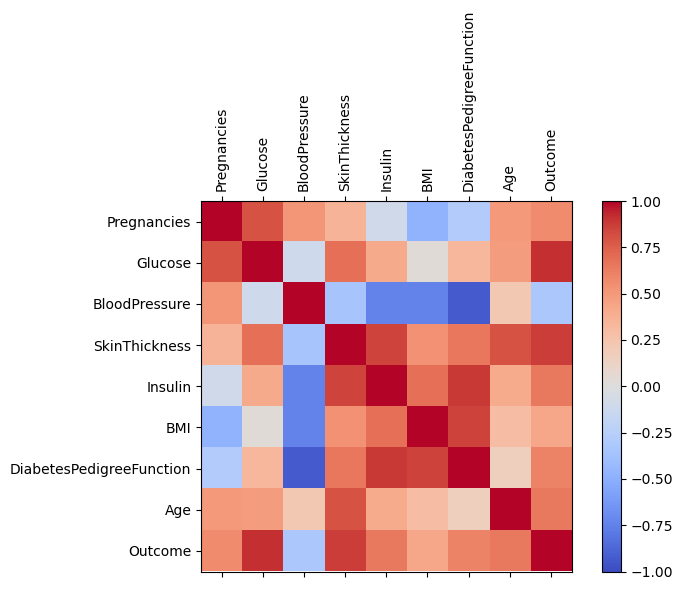

In [63]:
correlations = df.corr()

fig = pyplot.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1, cmap='coolwarm')  # Added colormap for clarity
fig.colorbar(cax)

ticks = np.arange(len(df.columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xticklabels(df.columns, rotation=90)  # Rotate labels for readability
ax.set_yticklabels(df.columns)

pyplot.tight_layout()
pyplot.show()


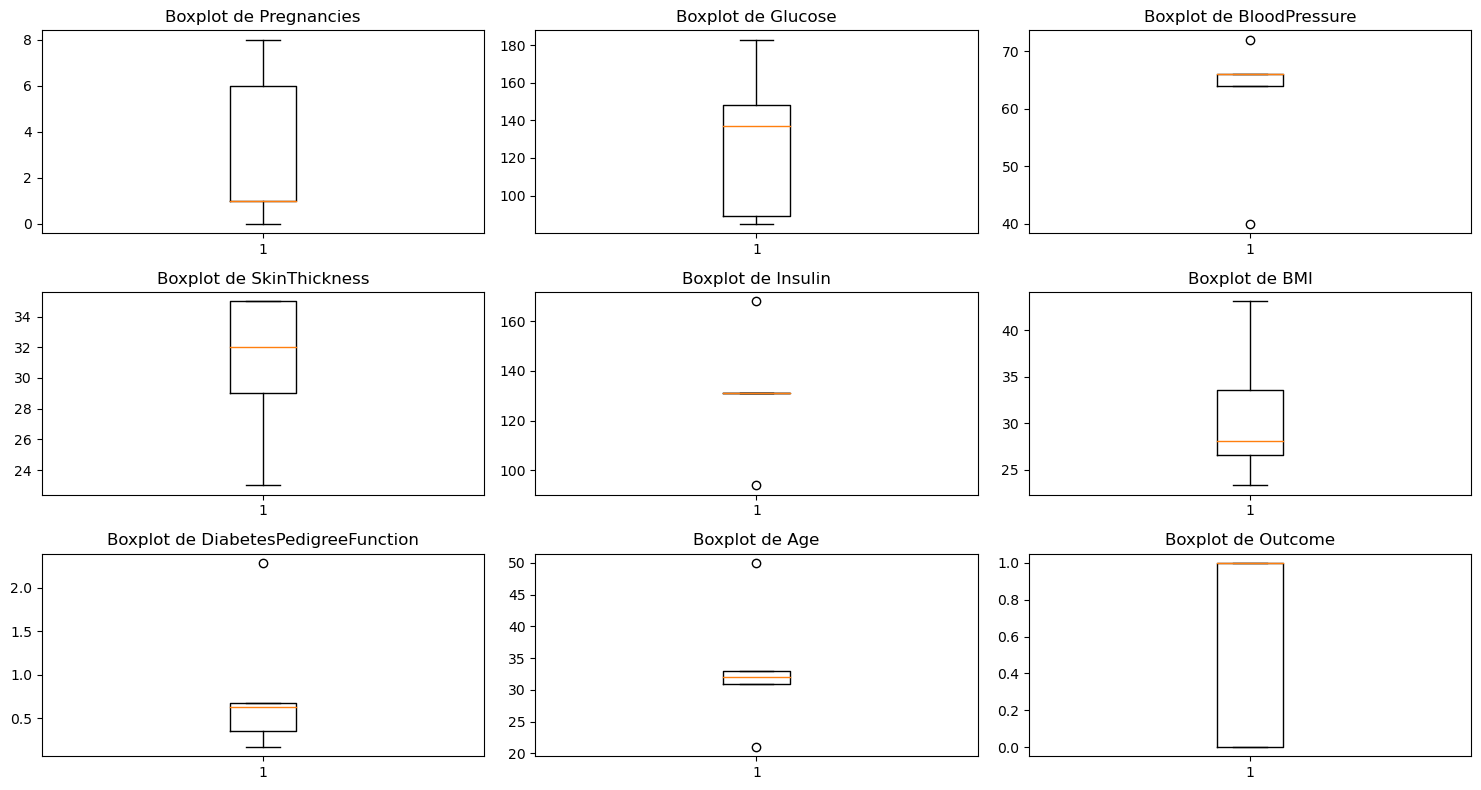

In [64]:
plt.figure(figsize=(15, 8))
# Afficher un boxplot pour chaque colonne numérique
for i, col in enumerate(df, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(df[col].dropna())
    plt.title(f'Boxplot de {col}')
# Afficher les graphiques
plt.tight_layout()
plt.show()

In [65]:
numeriques_data = data.select_dtypes(include=[np.number]).columns
for col in numeriques_data:
    Q1 = data[col].quantile(0.25) 
    Q3 = data[col].quantile(0.75) 
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.where((data[col] < lower_bound) | (data[col] > upper_bound), data[col].median(), data[col]) 
print(data[numeriques_data].describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.782552  121.656250      72.108073      26.054688   57.361165   
std       3.270644   30.438286      10.874178       7.057568   43.577852   
min       0.000000   44.000000      40.000000      11.000000   14.000000   
25%       1.000000   99.750000      64.000000      23.000000   30.500000   
50%       3.000000  117.000000      72.000000      23.000000   30.593750   
75%       6.000000  140.250000      80.000000      31.000000   76.000000   
max      13.000000  199.000000     104.000000      43.000000  184.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.107031                  0.408996   32.032552    0.348958  
std      6.284780                  0.218380   10.082592    0.476951  
min     18.200000                  

In [66]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Séparer les caractéristiques (X) et la cible (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome'].astype(int)  
# Normaliser les caractéristiques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [67]:
# Division train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


ValueError: The test_size = 1 should be greater or equal to the number of classes = 2

In [68]:
# Afficher la distribution des classes
print(y.value_counts())

# Appliquer SMOTE pour équilibrer les classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

Outcome
1    3
0    2
Name: count, dtype: int64


ValueError: Expected n_neighbors <= n_samples,  but n_samples = 2, n_neighbors = 6

In [69]:
# Calculer le nombre d'occurrences de chaque classe dans la colonne cible
class_counts = df['Outcome'].value_counts()

# Afficher les résultats
print(class_counts)

Outcome
1    3
0    2
Name: count, dtype: int64


ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

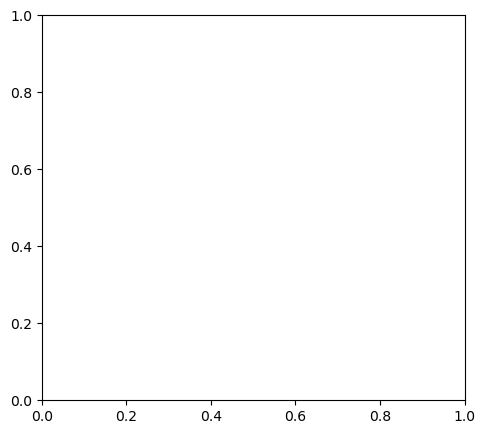

In [70]:
# Visualisation avant SMOTE
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette='Set2')
plt.title("Distribution des classes avant SMOTE")
plt.xlabel("Classe")
plt.ylabel("Nombre d'exemples")

# Visualisation après SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled, palette='Set2')
plt.title("Distribution des classes après SMOTE")
plt.xlabel("Classe")

plt.ylabel("Nombre d'exemples")

plt.tight_layout()
plt.show()


Epoch 0, Train Loss: 0.7005, Val Loss: 0.5354, Train Acc: 0.7152, Val Acc: 0.7273
Epoch 10, Train Loss: 0.4119, Val Loss: 0.4335, Train Acc: 0.8283, Val Acc: 0.7792
Epoch 20, Train Loss: 0.3704, Val Loss: 0.4336, Train Acc: 0.8543, Val Acc: 0.7727
Epoch 30, Train Loss: 0.3445, Val Loss: 0.4506, Train Acc: 0.8674, Val Acc: 0.7662
Epoch 40, Train Loss: 0.3353, Val Loss: 0.4797, Train Acc: 0.8891, Val Acc: 0.7727
Epoch 50, Train Loss: 0.2868, Val Loss: 0.4976, Train Acc: 0.9065, Val Acc: 0.7922
Epoch 60, Train Loss: 0.2586, Val Loss: 0.5290, Train Acc: 0.9087, Val Acc: 0.7727
Epoch 70, Train Loss: 0.2608, Val Loss: 0.5556, Train Acc: 0.9239, Val Acc: 0.7597
Epoch 80, Train Loss: 0.2279, Val Loss: 0.6595, Train Acc: 0.9261, Val Acc: 0.7597
Epoch 90, Train Loss: 0.1980, Val Loss: 0.7583, Train Acc: 0.9239, Val Acc: 0.7662
Epoch 0, Train Loss: 0.6566, Val Loss: 0.5887, Train Acc: 0.7373, Val Acc: 0.6829
Epoch 10, Train Loss: 0.4266, Val Loss: 0.5062, Train Acc: 0.8391, Val Acc: 0.7154
Epoch 

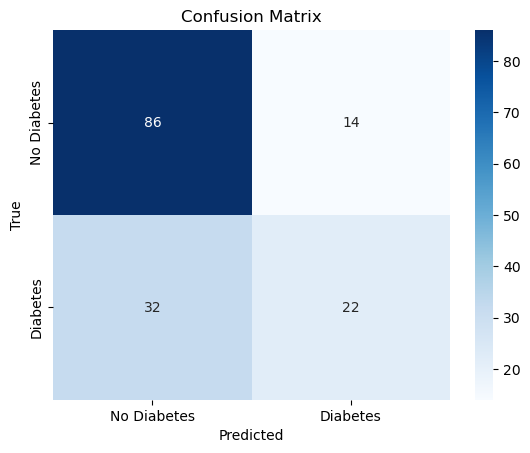

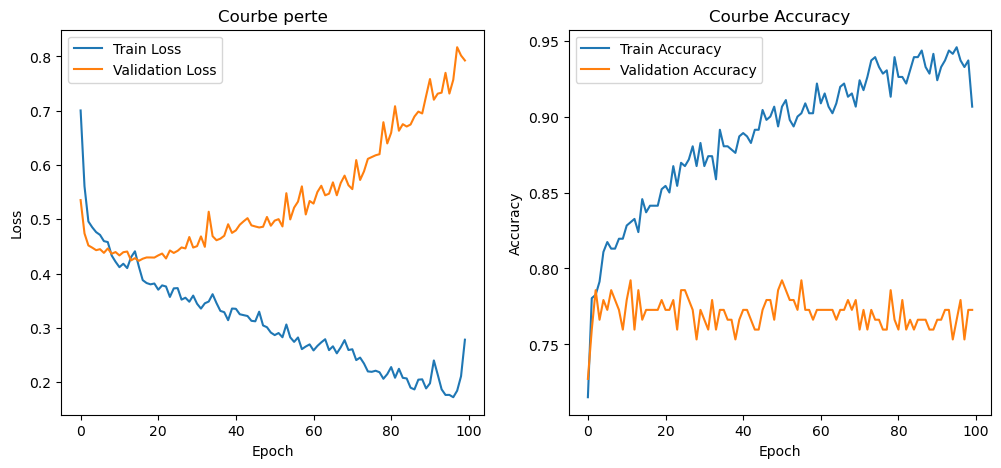

In [16]:
# Activation functions
def relu(x):
    assert isinstance(x, np.ndarray), "Input to ReLU must be a numpy array"
    result = np.maximum(0, x)
    assert np.all(result >= 0), "ReLU output must be non-negative"
    return result

def relu_derivative(x):
    assert isinstance(x, np.ndarray), "Input to ReLU derivative must be a numpy array"
    result = np.where(x > 0, 1, 0)
    assert np.all((result == 0) | (result == 1)), "ReLU derivative must be 0 or 1"
    return result

def sigmoid(x):
    assert isinstance(x, np.ndarray), "Input to sigmoid must be a numpy array"
    x = np.clip(x, -500, 500)
    result = 1 / (1 + np.exp(-x))
    assert np.all((result >= 0) & (result <= 1)), "Sigmoid output must be in [0, 1]"
    return result

def sigmoid_derivative(x):
    assert isinstance(x, np.ndarray), "Input to sigmoid derivative must be a numpy array"
    sig = sigmoid(x)
    result = sig * (1 - sig)
    assert np.all((result >= 0) & (result <= 0.25)), "Sigmoid derivative must be in [0, 0.25]"
    return result

# Neural Network class
class NeuralNetwork:
    def __init__(self, layer_sizes, learning_rate=0.01):
        assert isinstance(layer_sizes, list) and len(layer_sizes) >= 2, "layer_sizes must be a list with at least 2 elements"
        assert all(isinstance(size, int) and size > 0 for size in layer_sizes), "All layer sizes must be positive integers"
        assert isinstance(learning_rate, (int, float)) and learning_rate > 0, "Learning rate must be a positive number"
        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        self.weights = []
        self.biases = []
        self.beta1 = 0.9
        self.beta2 = 0.999
        self.epsilon = 1e-8
        np.random.seed(42)
        for i in range(len(layer_sizes) - 1):
            w = np.random.randn(layer_sizes[i], layer_sizes[i+1]) * np.sqrt(2 / layer_sizes[i])
            b = np.zeros((1, layer_sizes[i+1]))
            assert w.shape == (layer_sizes[i], layer_sizes[i+1]), f"Weight matrix {i+1} has incorrect shape"
            assert b.shape == (1, layer_sizes[i+1]), f"Bias vector {i+1} has incorrect shape"
            self.weights.append(w)
            self.biases.append(b)
        self.m_weights = [np.zeros_like(w) for w in self.weights]
        self.v_weights = [np.zeros_like(w) for w in self.weights]
        self.m_biases = [np.zeros_like(b) for b in self.biases]
        self.v_biases = [np.zeros_like(b) for b in self.biases]
        self.t = 0

    def forward(self, X):
        assert isinstance(X, np.ndarray), "Input X must be a numpy array"
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension ({X.shape[1]}) must match input layer size ({self.layer_sizes[0]})"
        self.activations = [X]
        self.z_values = []
        for i in range(len(self.weights) - 1):
            z = np.dot(self.activations[-1], self.weights[i]) + self.biases[i]
            assert z.shape == (X.shape[0], self.layer_sizes[i+1]), f"Z^{[i+1]} has incorrect shape"
            a = relu(z)
            self.z_values.append(z)
            self.activations.append(a)
        z = np.dot(self.activations[-1], self.weights[-1]) + self.biases[-1]
        assert z.shape == (X.shape[0], self.layer_sizes[-1]), "Output Z has incorrect shape"
        self.z_values.append(z)
        output = sigmoid(z)
        assert output.shape == (X.shape[0], self.layer_sizes[-1]), "Output A has incorrect shape"
        self.activations.append(output)
        return self.activations[-1]

    def compute_loss(self, y_true, y_pred):
        assert isinstance(y_true, np.ndarray) and isinstance(y_pred, np.ndarray), "Inputs to loss must be numpy arrays"
        assert y_true.shape == y_pred.shape, "y_true and y_pred must have the same shape"
        assert np.all((y_true == 0) | (y_true == 1)), "y_true must contain only 0s and 1s"
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        assert not np.isnan(loss), "Loss computation resulted in NaN"
        return loss

    def compute_accuracy(self, y_true, y_pred):
        assert isinstance(y_true, np.ndarray) and isinstance(y_pred, np.ndarray), "Inputs to accuracy must be numpy arrays"
        assert y_true.shape == y_pred.shape, "y_true and y_pred must have the same shape"
        predictions = (y_pred >= 0.5).astype(int)
        accuracy = np.mean(predictions == y_true)
        assert 0 <= accuracy <= 1, "Accuracy must be between 0 and 1"
        return accuracy

    def backward(self, X, y, outputs):
        assert isinstance(X, np.ndarray) and isinstance(y, np.ndarray) and isinstance(outputs, np.ndarray), "Inputs to backward must be numpy arrays"
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension ({X.shape[1]}) must match input layer size ({self.layer_sizes[0]})"
        assert y.shape == outputs.shape, "y and outputs must have the same shape"
        m = X.shape[0]
        self.d_weights = [np.zeros_like(w) for w in self.weights]
        self.d_biases = [np.zeros_like(b) for b in self.biases]
        dZ = outputs - y
        self.d_weights[-1] = (self.activations[-2].T @ dZ) / m
        self.d_biases[-1] = np.sum(dZ, axis=0, keepdims=True) / m
        lambda_reg = 0.01
        for i in range(len(self.weights) - 2, -1, -1):
            dA = dZ @ self.weights[i + 1].T
            dZ = dA * relu_derivative(self.z_values[i])
            self.d_weights[i] = (self.activations[i].T @ dZ) / m + lambda_reg * self.weights[i] / m
            self.d_biases[i] = np.sum(dZ, axis=0, keepdims=True) / m
        self.t += 1
        for i in range(len(self.weights)):
            self.m_weights[i] = self.beta1 * self.m_weights[i] + (1 - self.beta1) * self.d_weights[i]
            self.v_weights[i] = self.beta2 * self.v_weights[i] + (1 - self.beta2) * (self.d_weights[i] ** 2)
            self.m_biases[i] = self.beta1 * self.m_biases[i] + (1 - self.beta1) * self.d_biases[i]
            self.v_biases[i] = self.beta2 * self.v_biases[i] + (1 - self.beta2) * (self.d_biases[i] ** 2)
            m_hat_w = self.m_weights[i] / (1 - self.beta1 ** self.t)
            v_hat_w = self.v_weights[i] / (1 - self.beta2 ** self.t)
            m_hat_b = self.m_biases[i] / (1 - self.beta1 ** self.t)
            v_hat_b = self.v_biases[i] / (1 - self.beta2 ** self.t)
            self.weights[i] -= self.learning_rate * m_hat_w / (np.sqrt(v_hat_w) + self.epsilon)
            self.biases[i] -= self.learning_rate * m_hat_b / (np.sqrt(v_hat_b) + self.epsilon)

    def train(self, X, y, X_val, y_val, epochs, batch_size):
        train_losses = []
        val_losses = []
        train_accuracies = []
        val_accuracies = []
        for epoch in range(epochs):
            indices = np.random.permutation(X.shape[0])
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            epoch_loss = 0
            for i in range(0, X.shape[0], batch_size):
                X_batch = X_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]
                outputs = self.forward(X_batch)
                epoch_loss += self.compute_loss(y_batch, outputs)
                self.backward(X_batch, y_batch, outputs)
            train_loss = epoch_loss / (X.shape[0] // batch_size)
            train_outputs = self.forward(X)
            train_accuracy = self.compute_accuracy(y, train_outputs)
            val_outputs = self.forward(X_val)
            val_loss = self.compute_loss(y_val, val_outputs)
            val_accuracy = self.compute_accuracy(y_val, val_outputs)
            train_losses.append(train_loss)
            val_losses.append(val_loss)
            train_accuracies.append(train_accuracy)
            val_accuracies.append(val_accuracy)
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
                      f"Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")
        return train_losses, val_losses, train_accuracies, val_accuracies

    def predict(self, X):
        assert isinstance(X, np.ndarray), "Input X must be a numpy array"
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension ({X.shape[1]}) must match input layer size ({self.layer_sizes[0]})"
        outputs = self.forward(X)
        predictions = (outputs >= 0.5).astype(int)
        assert predictions.shape == (X.shape[0], self.layer_sizes[-1]), "Predictions have incorrect shape"
        return predictions

# Load and prepare data
data = pd.read_csv('diabetes.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1, 1)
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    data[col] = data[col].replace(0, data[col].median())
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1, 1)
assert X.shape[0] == y.shape[0], "Number of samples in X and y must match"
assert X.shape[1] == 8, "Expected 8 features in input data"
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
std[std == 0] = 1
X = (X - mean) / std

# Train-val-test split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)
assert X_train.shape[0] + X_val.shape[0] + X_test.shape[0] == X.shape[0], "Train-val-test split sizes must sum to total samples"

# Create and train model
layer_sizes = [X_train.shape[1], 16, 8, 1]
nn = NeuralNetwork(layer_sizes, learning_rate=0.01)
train_losses, val_losses, train_accuracies, val_accuracies = nn.train(X_train, y_train, X_val, y_val, epochs=100, batch_size=32)

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracies = []
for train_idx, val_idx in kf.split(X_temp):
    X_train_cv, X_val_cv = X_temp[train_idx], X_temp[val_idx]
    y_train_cv, y_val_cv = y_temp[train_idx], y_temp[val_idx]
    nn_cv = NeuralNetwork(layer_sizes, learning_rate=0.01)
    nn_cv.train(X_train_cv, y_train_cv, X_val_cv, y_val_cv, epochs=100, batch_size=32)
    y_val_pred = nn_cv.predict(X_val_cv)
    cv_accuracy = nn_cv.compute_accuracy(y_val_cv, nn_cv.forward(X_val_cv))
    cv_accuracies.append(cv_accuracy)
print(f"Cross-validation accuracies: {cv_accuracies}")
print(f"Mean CV accuracy: {np.mean(cv_accuracies):.4f} ± {np.std(cv_accuracies):.4f}")

# Predictions and evaluation
y_pred = nn.predict(X_test)
print("\nClassification Report (Test set):")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'], 
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Loss and accuracy curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(train_losses, label='Train Loss')
ax1.plot(val_losses, label='Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Courbe perte')
ax1.legend()
ax2.plot(train_accuracies, label='Train Accuracy')
ax2.plot(val_accuracies, label='Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Courbe Accuracy')
ax2.legend()
plt.show()